In [1]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.loggers import WandbLogger
from torch.utils.data import DataLoader

from src.models.BarlowTwinsVQVAE import BarlowTwinsVQVAE

from src.preprocessing.augmentations import Augmentations
from src.preprocessing.preprocess_ucr import AugUCRDataset, UCRDataset, UCRDatasetImporter
from src.preprocessing.data_pipeline import build_data_pipeline
from src.utils import load_yaml_param_settings
from src.utils import save_model

import numpy as np

import matplotlib.pyplot as plt

In [2]:
config_dir = 'src/configs/config.yaml' #dir to config file

config = load_yaml_param_settings(config_dir)

# data pipeline
dataset_importer = UCRDatasetImporter(**config['dataset'])
batch_size = config['dataset']['batch_sizes']['vqvae']
train_data_loader_non_aug, test_data_loader= [build_data_pipeline(batch_size, dataset_importer, config, kind, shuffle_train=False) for kind in ['train', 'test']]

augmentations = ['AmpR','STFT', 'flip', 'slope']
train_data_loader_aug = build_data_pipeline(batch_size, dataset_importer, config, "train",  augmentations, shuffle_train=False)

for batch in train_data_loader_aug:
    subxs, y = batch
    break

for batch in train_data_loader_non_aug:
    x, y = batch

self.X_train.shape: (1000, 1024)
self.X_test.shape: (8236, 1024)
# unique labels (train): [0 1 2]
# unique labels (test): [0 1 2]


In [3]:
from src.models.BarlowTwinsVQVAE import BarlowTwinsVQVAE
input_length = train_data_loader_non_aug.dataset.X.shape[-1]
m = BarlowTwinsVQVAE(input_length, test_data_loader, train_data_loader_non_aug, config, len(train_data_loader_non_aug))

from src.models.vqvae import VQVAE
m_r = VQVAE(input_length, test_data_loader, train_data_loader_non_aug, config, len(train_data_loader_non_aug))

In [4]:
x1, x2 = subxs[0]
x1 = x1.squeeze(1)
x2 = x2.squeeze(1)

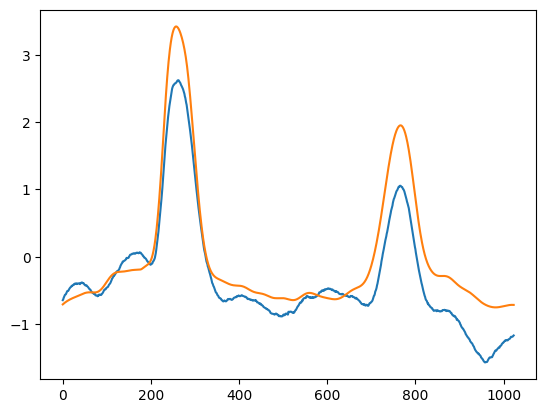

In [5]:
i = 10
plt.plot(x2[i])
plt.plot(x1[i])

In [6]:
zs, ys = m.encode_data(train_data_loader_non_aug, m.encoder, cuda=False)

In [7]:
from src.models.barlowtwins import BarlowTwins, Projector

In [8]:
projector = Projector(last_channels_enc=64, proj_hid=512, proj_out=512, device="cpu")

In [9]:
p_tr = projector(zs)

In [11]:
p_tr.shape

torch.Size([1000, 512])

In [4]:
import numpy as np
np.random.rand()

0.8626420079030777